# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
#Show example of json

# # Save config information
# url = "http://api.openweathermap.org/data/2.5/weather?"
# cityname = "Cape Town"

# # Build query URL
# query_url = url + "appid=" + api_key + "&q=" + cityname + "&units=imperial"



In [52]:
# # Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
    
# pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -33.93, 'lon': 18.42},
 'dt': 1546894800,
 'id': 3369157,
 'main': {'humidity': 72,
          'pressure': 1011,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Cape Town',
 'sys': {'country': 'ZA',
         'id': 1899,
         'message': 0.0036,
         'sunrise': 1546832647,
         'sunset': 1546884077,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 200, 'speed': 19.46}}


In [42]:
#Create lists for variables
temperatures = []
humiditypercents = []
cloudinesspercents = []
windspeedsmph = [] 
lats = []
longs = []
names = []

#Begin retrieving data from API
print("""
Beginning Data Retrieval     
-----------------------------
""")

for city in cities:
    
    #print activity for each city
    
    print(f"Processing Record {cities.index(city)+1}| {city}")
    
    #API url for each city
    
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    #Try/Except to ignore cities that do not exist within the API
    
    try:
    
        temperature = weather_json["main"]["temp_max"]
        temperatures.append(temperature)

        humidity = weather_json["main"]["humidity"]
        humiditypercents.append(humidity)

        cloudiness = weather_json["clouds"]["all"]
        cloudinesspercents.append(cloudiness)

        windspeed = weather_json["wind"]["speed"]
        windspeedsmph.append(windspeed)
        
        latitude = weather_json["coord"]["lat"]
        lats.append(latitude)
        
        longitude = weather_json["coord"]["lon"]
        longs.append(longitude)
        
        name = weather_json["name"]
        names.append(name)

        
    except:
        
        print("City not found. Skipping...")
                


Beginning Data Retrieval     
-----------------------------

Processing Record 1| cape town
Processing Record 2| morrinhos
Processing Record 3| palmer
Processing Record 4| marcona
City not found. Skipping...
Processing Record 5| hay river
Processing Record 6| yumen
Processing Record 7| hithadhoo
Processing Record 8| ushuaia
Processing Record 9| rapid city
Processing Record 10| upernavik
Processing Record 11| bredasdorp
Processing Record 12| jacareacanga
Processing Record 13| port-gentil
Processing Record 14| kodiak
Processing Record 15| chagda
City not found. Skipping...
Processing Record 16| rikitea
Processing Record 17| carauari
Processing Record 18| kutum
Processing Record 19| mar del plata
Processing Record 20| kapaa
Processing Record 21| rio gallegos
Processing Record 22| tuktoyaktuk
Processing Record 23| tasiilaq
Processing Record 24| souillac
Processing Record 25| svetlogorsk
Processing Record 26| albany
Processing Record 27| bathsheba
Processing Record 28| comodoro rivadavia
P

Processing Record 233| cabo rojo
Processing Record 234| bardsir
Processing Record 235| norman wells
Processing Record 236| juneau
Processing Record 237| beachwood
Processing Record 238| ola
Processing Record 239| den helder
Processing Record 240| santa rosa
Processing Record 241| witu
Processing Record 242| kalaleh
Processing Record 243| avarua
Processing Record 244| jacobina
Processing Record 245| ust-nera
Processing Record 246| vila
Processing Record 247| flinders
Processing Record 248| ahipara
Processing Record 249| grand gaube
Processing Record 250| neunkirchen
Processing Record 251| kahului
Processing Record 252| tigre
Processing Record 253| marijampole
Processing Record 254| praia da vitoria
Processing Record 255| muroto
Processing Record 256| tubruq
City not found. Skipping...
Processing Record 257| sao felix do xingu
Processing Record 258| carmo do paranaiba
Processing Record 259| virginia beach
Processing Record 260| mount isa
Processing Record 261| saldanha
Processing Record 

Processing Record 464| asmara
Processing Record 465| ayagoz
Processing Record 466| senanga
Processing Record 467| deder
Processing Record 468| fairbanks
Processing Record 469| churapcha
Processing Record 470| temaraia
City not found. Skipping...
Processing Record 471| salaverry
Processing Record 472| nome
Processing Record 473| lidkoping
Processing Record 474| leh
Processing Record 475| bunbury
Processing Record 476| yar-sale
Processing Record 477| zolotinka
City not found. Skipping...
Processing Record 478| ucluelet
Processing Record 479| takayama
Processing Record 480| yamada
Processing Record 481| dudinka
Processing Record 482| waw
City not found. Skipping...
Processing Record 483| dire dawa
Processing Record 484| salalah
Processing Record 485| nabire
Processing Record 486| maniitsoq
Processing Record 487| vostok
Processing Record 488| buala
Processing Record 489| foix
Processing Record 490| bar harbor
Processing Record 491| marystown
Processing Record 492| tarragona
Processing Reco

In [65]:
# print(len(temperatures))
# print(len(humiditypercents))
# print(len(cloudinesspercents))
# print(len(windspeedsmph))
# print(len(lats))
# print(len(longs))
# print(len(names))

In [ ]:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
#Create DataFrame

weatherdic = {"City": names, "Cloudiness": cloudinesspercents, "Humidity": humiditypercents,
             "Lat": lats, "Lng": longs, "Max Temp": temperatures, "Wind Speed": windspeedsmph}
weatherdf = pd.DataFrame(weatherdic)
weatherdf.to_csv("weatherdata.csv",
                  encoding="utf-8", index=False, header=True)
weatherdf.head()

,City,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,20,72,-33.93,18.42,66.20,19.46
1,Morrinhos,76,92,-3.23,-40.13,76.83,7.74
2,Palmer,90,84,61.60,-149.11,5.00,4.70
3,Hay River,90,63,60.82,-115.79,-11.21,10.29
4,Yumen,32,78,40.29,97.04,0.78,5.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

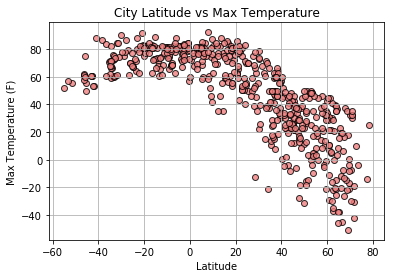

In [59]:
temperatureplot = plt.scatter(lats, temperatures, facecolors = 'lightcoral', edgecolors = 'black', 
                      alpha=0.80, linewidth = 1)
plt.grid()
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs Max Temperature')

plt.savefig("latvstemperaturedata.png", dpi = 'figure', bbox_inches = 'tight')

plt.show()

#### Latitude vs. Humidity Plot

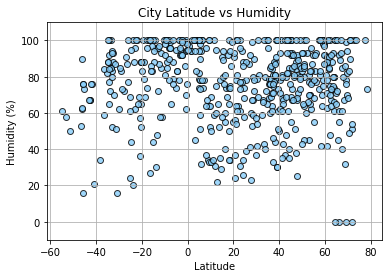

In [61]:
humidityplot = plt.scatter(lats, humiditypercents, facecolors = 'lightskyblue', edgecolors = 'black', 
                      alpha=0.80, linewidth = 1)
plt.grid()
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs Humidity')
plt.ylim(-10, 110)

plt.savefig("latvshumiditydata.png", dpi = 'figure', bbox_inches = 'tight')

plt.show()

#### Latitude vs. Cloudiness Plot

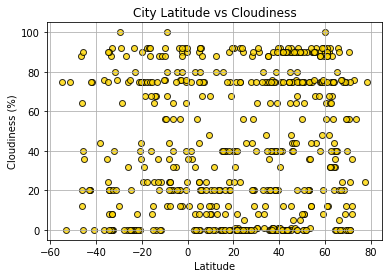

In [62]:
cloudinessplot = plt.scatter(lats, cloudinesspercents, facecolors = 'gold', edgecolors = 'black', 
                      alpha=0.80, linewidth = 1)
plt.grid()
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs Cloudiness')

plt.savefig("latvscloudinessdata.png", dpi = 'figure', bbox_inches = 'tight')

plt.show()

#### Latitude vs. Wind Speed Plot

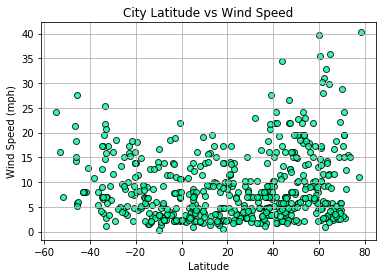

In [63]:
windspeedplot = plt.scatter(lats, windspeedsmph, facecolors = 'mediumspringgreen', edgecolors = 'black', 
                      alpha=0.80, linewidth = 1)
plt.grid()
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('City Latitude vs Wind Speed')

plt.savefig("latvswindspeeddata.png", dpi = 'figure', bbox_inches = 'tight')

plt.show()